In [665]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [666]:
npz = np.load('part1a.npz')
lst = npz.files
for item in lst:
    print(item)
    print(npz[item])

N = npz['N']
SVC_0_pmf = npz['Svc_0_pmf']
Lc = npz['Lc'] 
I_v= npz['Ic_0']
gamma = npz['gamma']
R = np.zeros(1)
R[0] = 0
Z = np.zeros(21)
I = np.sum(I_v)
S__ = N - I # not sure. Do this so that the total population actually adds to 100000...
S_v_c_2 = np.multiply(SVC_0_pmf, S__) # Preserve matrix form for later...
S_v_c = S_v_c_2.flatten()
S_v_I_v_R = np.concatenate((S_v_c,I_v, R)) 
print(S_v_c.sum(axis=0).sum(axis=0), I_v, R)

N
100000.0
Svc_0_pmf
[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]
Lc
[0.3 0.4 0.7 1. ]
Ic_0
[47 90 51 65]
gamma
0.07142857142857142
99746.99999999997 [47 90 51 65] [0.]


In [667]:
# Part 1 a. Chose elements for B_v,c in [0.1]

B_v_c = np.random.rand(16).reshape(4,4)
B_v_c = np.sort(B_v_c, axis = 0)
B_v_c_2 = np.sort(B_v_c, axis = 1) # Preserve matrix form for later...
B_v_c = B_v_c_2.flatten() # Now we have elements (0,0) (0,1) (0,2) (0,3) (1,0) .... (3,3)
print(B_v_c)
print(B_v_c_2)

[0.11520074 0.15667714 0.16165038 0.18035939 0.22656653 0.26424455
 0.3628515  0.53946172 0.28663936 0.35298334 0.61467858 0.73664062
 0.36620567 0.7634396  0.88207342 0.9897143 ]
[[0.11520074 0.15667714 0.16165038 0.18035939]
 [0.22656653 0.26424455 0.3628515  0.53946172]
 [0.28663936 0.35298334 0.61467858 0.73664062]
 [0.36620567 0.7634396  0.88207342 0.9897143 ]]


In [668]:
def susceptible_pop_eq_simple(t, y):
#     return -B_v_c * S * I/N
    return [-B_v_c[0] * y[0] * y[1] / N,  B_v_c[0]*y[0]*y[1]-gamma*y[1], gamma*y[1]]

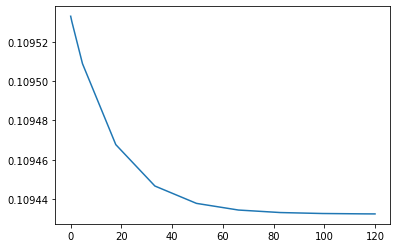

In [669]:
sol_ = solve_ivp(fun = susceptible_pop_eq_simple, t_span = (0,120), y0 = [0.10953309, 47, 0])

# Example without c and v
# print(S_v_c.shape, B_v_c.shape, (S_v_c[0] * B_v_c[0] * I / N).shape)
plt.plot(sol_.t, sol_.y[0])

In [727]:
def susceptible_pop_eq(t, y):
    # y is our S_v_I_v_R vector
    # I = infected population
    # Need to get sum of dS_v_c/dt made over v. Should be a (4,1) vector
    # Sum over v. Should have column of c = 0, c= 1, c= 2, c=3
#     S_sum_over_v = S_v_c_2.sum(axis=1) 
#     B_sum_over_v = B_v_c_2.sum(axis=1)
#     I = y[16:20].sum()
#     S_dt_arr = np.zeros(16)
#     for i in range(16):
#         S_dt_arr[i] = -(B_v_c[i] * S_v_c[i] * I/N)
#     I_dt_arr = np.zeros(4)
#     for i in range(4):
#         I_dt_arr[i] = (B_sum_over_v[i] * S_sum_over_v[i] * I/N) - gamma*y[16+i]

#     R_dt = np.zeros(1)
#     R_dt[0] = (gamma * I) 
    
#     dS_dI_dr = np.concatenate((S_dt_arr,I_dt_arr,R_dt))
    S_vector=y[:16]
    I_vector=y[16:20]
    R=y[20]
    dSvc_dt = -(B_v_c * S_v_c * I_vector.sum()/N)
    dS_v = dSvc_dt.reshape(4,4).sum(axis=0)
#     dsums = [-sum(dSvc_dt[0:4]), -sum(dSvc_dt[4:8]), -sum(dSvc_dt[8:12]), -sum(dSvc_dt[12:16])]
    dIc_dt = -(dS_v) - gamma * I_vector
    dR_dt = gamma * I_vector.sum()
    dS_dI_dr = np.concatenate((dSvc_dt, dIc_dt, [dR_dt]), axis = 0)
    return dS_dI_dr

In [728]:
sol = solve_ivp(fun = susceptible_pop_eq, t_span = (0,120,1), y0 = S_v_I_v_R)

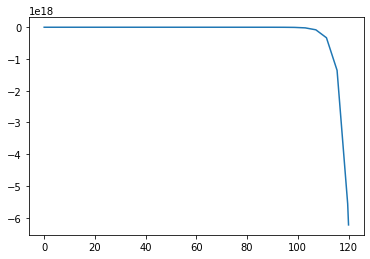

In [729]:
plt.plot(sol.t, sol.y[5])

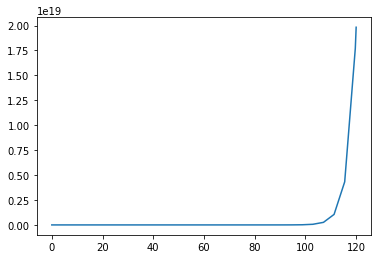

In [730]:
plt.plot(sol.t, sol.y[20])

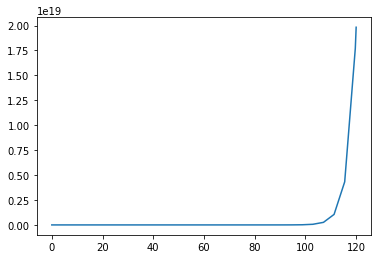

In [731]:
plt.plot(sol.t, sol.y[20])

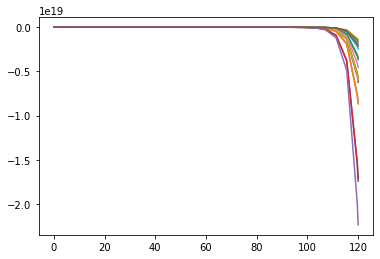

In [732]:
# %matplotlib inline
for i in range(16):
    plt.plot(sol.t, sol.y[i])

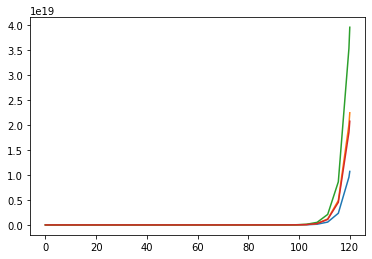

In [733]:
import seaborn as sns
for i in range(16,20):
    sns.lineplot(sol.t, sol.y[i])


In [782]:
# Part 1b
data_ = np.load('part1b.npz')
lst_ = data.files
for item in lst_:
    print(item)
    print(data_[item])

N = data_['N']
Lc = data_['Lc']
Ic_0 = data_['Ic_0']
gamma = data_['gamma']
L_validation = data_['L_validation']
L_test = data_['L_test']
betas_validation = data_['betas_validation']

N
50000.0
Lc
[0.3 0.4 0.7 1. ]
Ic_0
[[47 90 51 65]
 [82 31 64 86]
 [30 66 39 47]
 [59 26 77 38]
 [20 63 70 15]
 [35 31 78 11]
 [50 55 93 26]
 [17 89 65 25]
 [70 27 66 97]
 [20 18 32 31]
 [76 13 61 15]
 [86 48 36 89]
 [96 15 44 71]
 [81 53 19 36]
 [29 44 99 36]
 [25 34 16 28]
 [23 84 71 31]
 [91 70 90 90]
 [32 11 68 81]
 [34 37 48 41]]
gamma
0.07142857142857142
L_validation
[[  151.15723798   157.09236032   166.0663423    175.26894184
    187.12271809   200.29536627   207.19011153   220.23944915
    235.52590645   247.09469931   263.51055631   281.18896107
    304.53407513   316.7776232    337.4146583    359.08603642
    376.95873111   410.63777058   432.23666001   466.32640805]
 [  168.20103748   175.31698233   184.41546073   191.23318015
    200.38958258   212.84378649   222.09570163   237.44506788
    251.13497681   263.20329764   281.12505942   299.02683147
    312.07088043   336.08191882   353.17466265   372.3214408
    404.21116271   424.09816716   450.52039605   482.72819186]
 [ 

In [783]:
print(L_validation.shape)
np.sum(Lc * Ic_0[1])
b_c = 0.20

(20, 20)


In [811]:
def susceptible_pop_eq_b(t, y, beta):
    S_c = y[0:4]
    I_c = y[4:8]
    R = y[8]
    dS_dt = -beta * S_c * I/N # This should be a 4x1 vector
    dI_dt = -dS_dt - gamma * I_c
    dR_dt = gamma * I_c.sum()
    dS_dI_dR = np.concatenate((dS_dt, dI_dt, [dR_dt]))
    return dS_dI_dR

In [808]:

sol_object = solve_ivp(fun = susceptible_pop_eq_b, t_span = (0,20),y0 = np.array([25000, 15000, 5000, 5000, 47, 90, 51, 65,0]))

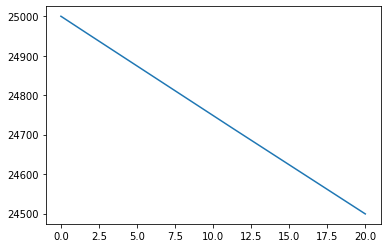

In [809]:
plt.plot(sol_object.t, sol_object.y[0])

In [827]:
from sklearn.metrics import mean_squared_error
from itertools import product
# Gridsearch
# We want to estimate beta 
# We will try different values of beta and see which one fits better the data
# How? We find I_c and then for each node find L_estimated and compare it with L_validation
Sc_pmf = np.array([0.5, 0.3, 0.1, 0.1])
Ic_0_ = Ic_0[0] # Infected people by compartment for first node
Sc_0 = Sc_pmf * (N - Ic_0_)
R_0 = 0
y = np.concatenate((Ic_0_, Sc_0, [R_0])) 
beta_grid = np.linspace(0,1,21)

print(beta_grid)
for (beta0, beta1, beta2, beta3) in product(beta_grid, beta_grid, beta_grid, beta_grid):
#     Construct y, which has S_0, I_0, R_0
    beta = np.array([beta0, beta1, beta2, beta3])
    sol_object = solve_ivp(fun = susceptible_pop_eq_b, t_span = (0,20), y0 = y, args = (beta))
    solution = sol_object.sol()[4:8].sum()*L_c[0] # Calculate L estimated
    mse = mean_squared_error(L_validation[0][0], solution) # Do mse of L estimated and L validation
    if mse < mmse:
        beta_mmse = beta 

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


TypeError: susceptible_pop_eq_b() takes 3 positional arguments but 6 were given